# QMP 4 circuits on Quantum Devices
## Qiskit codes for G2D3M3 columns in Fig. 6 and 7

In [11]:
import qiskit.tools.jupyter

%qiskit_version_table

In [2]:
from qiskit import *
from qiskit import IBMQ, transpile
from qiskit.visualization import plot_histogram
from qiskit.tools.visualization import plot_circuit_layout

from qiskit.providers.jobstatus import JobStatus
from qiskit.tools.monitor import job_monitor


from utils import *
from circuit_func import *



In [3]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-ornl', group='bnl', project='csc438')

In [4]:
# solutions : [Least Significant <-> Most Singnificant]
sol = [0,1,1,0,1]
shots = 8192
repetition = 30 # number of times running on device

In [5]:
def qc_G2D3M3(sol, guess_sol = None) -> QuantumCircuit:
    q = QuantumRegister(6)
    #c = ClassicalRegister(3, 'c')
    
    qc = QuantumCircuit(q)
    
    #qc = QuantumCircuit(6, name='G2D3M3')

    guess_pos = [0,2]
    if guess_sol == None:
        guess_sol = [sol[0],sol[1]]

    search_pos =   [3,4,5]  

    for i in search_pos:
        qc.h(i)
    
    for i in range(len(guess_pos)):
        if guess_sol[i] == 1:
            qc.x(guess_pos[i])
        else: continue
    
    #print(sol)
    sol = np.insert(sol,1,2)
    #print(sol)

    oracle(qc,q,[0,1,2,3,4,5],sol)

    diffusion_3q(qc, q, [3,4,5])

    return qc

# No QMP

In [6]:
n=6
m=1 # number of circuits

In [7]:
q_nomp = QuantumRegister(m*n, 'q')
c_nomp = ClassicalRegister(m*(n-3))

qc_nomp = QuantumCircuit(q_nomp, c_nomp)

qc_nomp.append(qc_G2D3M3(sol, [0,1]), range(0, 6))

qc_nomp.measure([3,4,5],[0,1,2])

Depth:  2


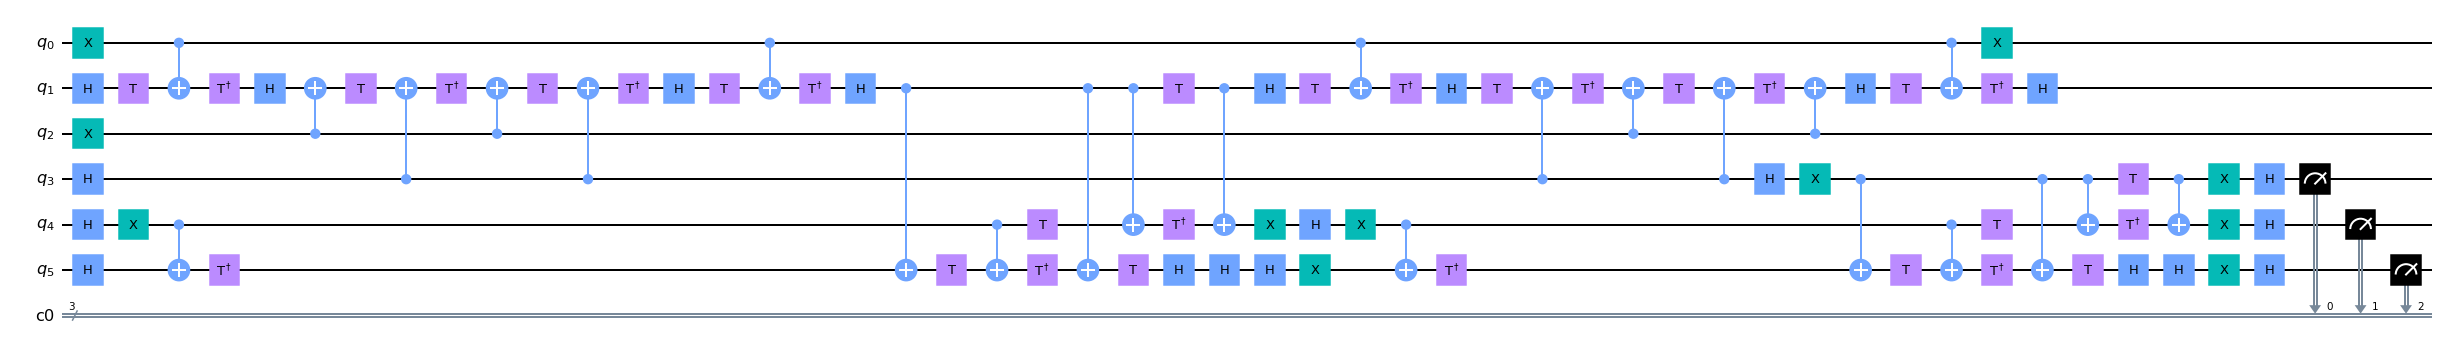

In [8]:
print('Depth: ', qc_nomp.depth())
qc_nomp.decompose().draw('mpl', fold=55)

In [10]:
# run on both devices.
#backend_device = provider.backend.ibmq_brooklyn
backend_device = provider.backend.ibm_washington

Depth:  82


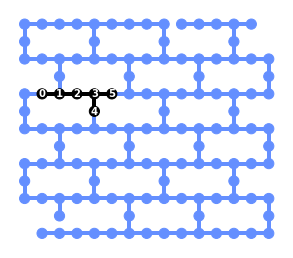

In [23]:
layout = None

qc_nomp_trans_layout = transpile(qc_nomp, backend_device, optimization_level=3, initial_layout=layout)
print('Depth: ', qc_nomp_trans_layout.depth())
plot_circuit_layout(qc_nomp_trans_layout, backend_device)

In [24]:
for _ in range(repetition):
    job_nomp_layout = backend_device.run(qc_nomp_trans_layout, shots=shots)
    job_id = job_nomp_layout.job_id()
    print("Job id", job_id)

Job id 62aba43e2927908bcdbad950
Job id 62aba43f440f5852c6aea783
Job id 62aba43f0068625c3f087895
Job id 62aba4404d3a79748b871b13
Job id 62aba441f6d9379c809950c4
Job id 62aba442292790a655bad951
Job id 62aba442440f5832bcaea784
Job id 62aba44300686238cd087896
Job id 62aba4464d3a7977c8871b14
Job id 62aba446f6d9373a819950c6
Job id 62aba447292790d45bbad952
Job id 62aba448440f588964aea785
Job id 62aba4490068620b26087897
Job id 62aba4494d3a796303871b15
Job id 62aba44af6d937a5a79950c7
Job id 62aba44b2927901e1cbad953
Job id 62aba44c22eb884e83ab7fe9
Job id 62aba44c4d3a79ef95871b16
Job id 62aba44df6d93773d49950c8
Job id 62aba44e292790a335bad954
Job id 62aba44e440f580a26aea786
Job id 62aba44f006862a944087898
Job id 62aba4504d3a791908871b18
Job id 62aba451f6d9378e3a9950c9
Job id 62aba45129279090bdbad955
Job id 62aba452440f589e39aea787
Job id 62aba4530068624703087899
Job id 62aba4534d3a797bfc871b19
Job id 62aba454f6d937de499950ca
Job id 62aba45529279097cbbad957


# QMP: 4 circuits

In [4]:
n=6
m=4 # number of circuits
q_mp = QuantumRegister(m*n, 'q')
c_mp = ClassicalRegister(m*(n-3))

qc_mp = QuantumCircuit(q_mp, c_mp)  # 0 applications of Q, only a single A operator

qc_mp.append(qc_G2D3M3(sol, [0,0]), range(n*0,n*(1)))
qc_mp.append(qc_G2D3M3(sol, [1,0]), range(n*1,n*(2)))
qc_mp.append(qc_G2D3M3(sol, [0,1]), range(n*2,n*(3))) # solution
qc_mp.append(qc_G2D3M3(sol, [1,1]), range(n*3,n*(4)))

for i in range(m):    
    qc_mp.measure([3 + i*n, 4 + i*n, 5 + i*n],[0+i*(n-3), 1+i*(n-3) ,2+i*(n-3)])

Depth:  50


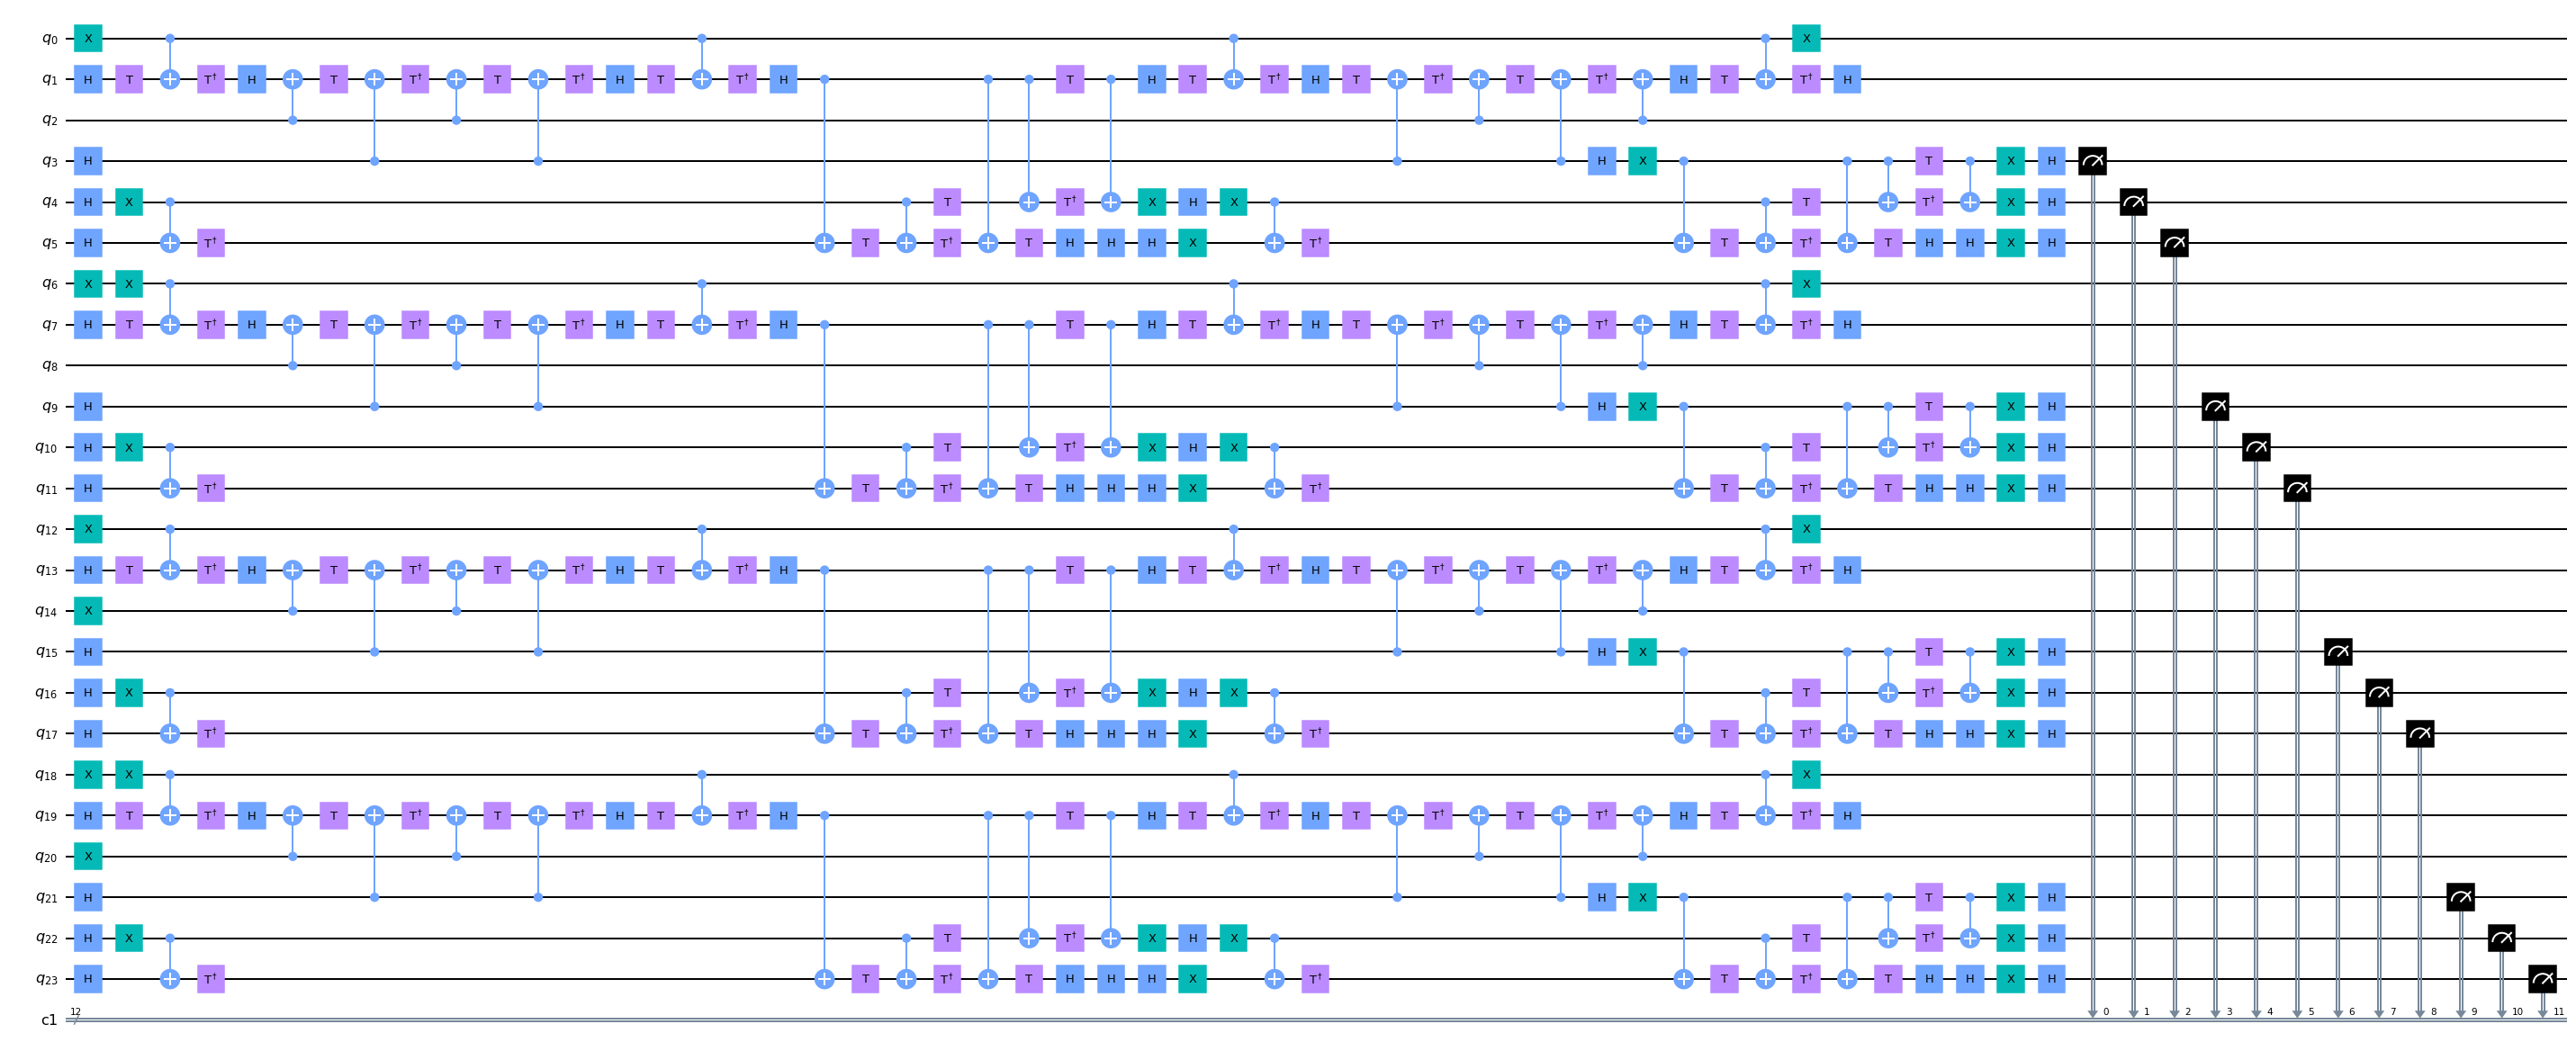

In [21]:
print('Depth: ', qc_mp.decompose().depth())
qc_mp.decompose().draw('mpl', fold=64)

# QMP: 4 circuits, default layout

Depth:  149


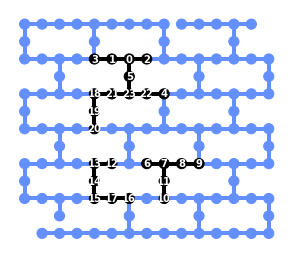

In [30]:
# run on both devices.
#backend_device = provider.backend.ibmq_brooklyn
backend_device = provider.backend.ibm_washington

qc_mp_trans_layout = transpile(qc_mp, backend_device, optimization_level=3, initial_layout=None)
print('Depth: ', qc_mp_trans_layout.depth())
plot_circuit_layout(qc_mp_trans_layout, backend_device)

In [31]:
for _ in range(repetition):
    job_mp_layout = backend_device.run(qc_mp_trans_layout, shots=shots)
    job_id = job_mp_layout.job_id()
    print("Job id", job_id)

Job id 62aba552440f582850aea794
Job id 62aba5524d3a79f48e871b25
Job id 62aba5535e6b2a321c81d394
Job id 62aba554e885f70edb9fa698
Job id 62aba555f09ecea178e3825a
Job id 62aba55521544ef43a02989e
Job id 62aba556e885f706579fa699
Job id 62aba557f6d93776589950dd
Job id 62aba5585e6b2a98eb81d395
Job id 62aba559006862a1850878a9
Job id 62aba5594d3a793dc7871b27
Job id 62aba55a21544e187b02989f
Job id 62aba55b22eb8802c4ab7ff7
Job id 62aba55df09eceb12de3825b
Job id 62aba55d5e6b2a9c7881d396
Job id 62aba55e22eb888b6bab7ff8
Job id 62aba55f4d3a79a073871b28
Job id 62aba55f2927903c16bad960
Job id 62aba5600068624fc10878ab
Job id 62aba561f09ecea3bce3825c
Job id 62aba562f09ece99bbe3825d
Job id 62aba56221544e34f40298a1
Job id 62aba5635e6b2aa9b281d397
Job id 62aba56422eb884951ab7ff9
Job id 62aba565e885f7c6529fa69a
Job id 62aba565f6d9376bd19950df
Job id 62aba5662927905953bad961
Job id 62aba567440f5840a6aea797
Job id 62aba567e885f759649fa69b
Job id 62aba569f6d937ec469950e0


# QMP: 4 circuits, Brooklyn, manual layout

min_depth:  86


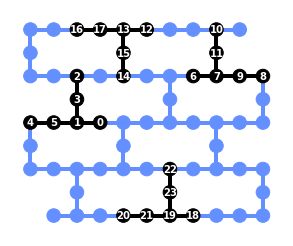

In [106]:
backend_device = provider.backend.ibmq_brooklyn

layout = [30,29,15,24,27,28,    20,21,23,22,8,12,    5,4,17,11,2,3,   61,60,58,59,47,53]

qc_mp_trans_layout = transpile(qc_mp, backend_device, optimization_level=3, initial_layout=layout)
print('min_depth: ', qc_mp_trans_layout)
plot_circuit_layout(qc_mp_trans_layout, backend_device)

In [107]:
for _ in range(repetition):
    job_mp_layout = backend_device.run(qc_mp_trans_layout, shots=shots)
    job_id = job_mp_layout.job_id()
    print("Job id", job_id)

Job id 62b8b180e1377df74209788a
Job id 62b8b181d654972152976c5b
Job id 62b8b182e7e88a2baf50c530
Job id 62b8b1831fa2bd714b308cdb
Job id 62b8b184d529f228032c8fdf
Job id 62b8b184e1377d9e2a09788b
Job id 62b8b1855ef42c24f1b27adf
Job id 62b8b186716a316fb75602ad
Job id 62b8b187d8901d36ea4b9440
Job id 62b8b188e47a73701a1a44f3
Job id 62b8b188d4d0c23bf21df168
Job id 62b8b1895ef42c7326b27ae0
Job id 62b8b18a716a3131145602ae
Job id 62b8b18bd8901d2ab24b9441
Job id 62b8b18ce47a734fb41a44f5
Job id 62b8b18dd4d0c232f21df169
Job id 62b8b18d5ef42c4331b27ae1
Job id 62b8b18e716a316b825602af
Job id 62b8b18fd8901d6a6e4b9442
Job id 62b8b190e47a736ab71a44f6
Job id 62b8b190d4d0c228141df16a
Job id 62b8b1915ef42c1b0ab27ae2
Job id 62b8b192716a314efe5602b0
Job id 62b8b193d8901d68414b9443
Job id 62b8b193e47a7374341a44f7
Job id 62b8b194d4d0c204a21df16b
Job id 62b8b1955ef42c4da6b27ae3
Job id 62b8b1961fa2bd85af308cdc
Job id 62b8b197d529f2a0ed2c8fe1
Job id 62b8b198e1377d60ba09788d


# QMP: 4 circuits, Washington, manual layout

min_depth:  87


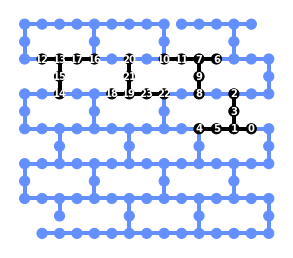

In [104]:
backend_device = provider.backend.ibm_washington


layout = [69,68,49,55,66,67,     29,28,47,35,26,27,    19,20,39,33,22,21,   42,43,24,34,45,44]

qc_mp_trans_layout = transpile(qc_mp, backend_device, optimization_level=3, initial_layout=layout)
print('min_depth: ', qc_mp_trans_layout)
plot_circuit_layout(qc_mp_trans_layout, backend_device)

In [105]:
for _ in range(repetition):
    job_mp_layout = backend_device.run(qc_mp_trans_layout, shots=shots)
    job_id = job_mp_layout.job_id()
    print("Job id", job_id)

Job id 62b8b0f8716a31cc8b5602a9
Job id 62b8b0f9d65497cf71976c56
Job id 62b8b0fad529f27a762c8fdb
Job id 62b8b0fbd4d0c28ce31df164
Job id 62b8b0fce7e88a52f950c52d
Job id 62b8b0fdd8901d28614b943a
Job id 62b8b0fee1377d6c8c097885
Job id 62b8b0ff716a318ce55602aa
Job id 62b8b0ffd6549713c0976c57
Job id 62b8b1001fa2bdb199308cd8
Job id 62b8b101d4d0c28d041df165
Job id 62b8b1025ef42cfc26b27ad8
Job id 62b8b103e47a73b2811a44f1
Job id 62b8b104d529f2426c2c8fdc
Job id 62b8b104d4d0c256331df166
Job id 62b8b105e7e88a3aa650c52e
Job id 62b8b106d8901d88fb4b943c
Job id 62b8b107e1377d5587097886
Job id 62b8b108716a3131b85602ab
Job id 62b8b109d654970e1d976c58
Job id 62b8b10ad529f286502c8fdd
Job id 62b8b10bd4d0c2bfea1df167
Job id 62b8b10ce7e88a4e6b50c52f
Job id 62b8b10cd8901d5fa04b943d
Job id 62b8b10de1377d2cf1097887
Job id 62b8b10e716a31046a5602ac
Job id 62b8b10fd654972793976c59
Job id 62b8b1101fa2bd4465308cd9
Job id 62b8b111e1377d8c7c097888
Job id 62b8b1125ef42cee96b27ada
